### Homework Rakamin Digifest - Mini Case
by Nugroho Adi Wirapratama

# Mengukur Performa Penjualan Ritel Online

## Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
with open ('/content/drive/MyDrive/Rakamin/# 33/online_retail_II.csv') as dataset:
  df = pd.read_csv(dataset)

In [ ]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


## Section 1 Menganalisis Rata-Rata Pendapatan Per Tahun
### Buat kolom baru dengan nama Year yang berisi nilai tahun dari Invoice Date

### Create New Feature: Year

In [ ]:
# Ubah tipe data kolom InvoiceDate menjadi tipe ‘datetime’
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [ ]:
# Membuat kolom baru 'Year' dimana mengambil tahun dari 'InvoiceDate'
df['Year'] = df['InvoiceDate'].dt.year
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009


## Buat filtering data dengan ketentuan di bawah ini dan simpan dalam variabel baru, misalnya sales
### Ketentuan :
- Quantity minimal 1 (tidak boleh 0 dan minus)
- Kolom Invoice tidak mengandung huruf ‘C’ karena hal tersebut menandakan pelanggan tidak menyelesaikan belanjanya atau melakukan pembatalan.

### Filtering Data

In [ ]:
# Quantity minimal 1 (tidak boleh 0 dan minus)
# Kolom Invoice tidak mengandung huruf ‘C’ karena hal tersebut menandakan pelanggan tidak menyelesaikan belanjanya atau melakukan pembatalan.
sales = df[(~df.Invoice.str.contains('C')) & (df.Quantity > 0)]
sales.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009


### Create New Feature: Revenue

## Buat kolom baru bernama Revenue dengan nilai Quantity dikali dengan Price

In [ ]:
sales['Revenue'] = sales['Quantity'] * sales['Price']
sales.head()

<ipython-input-81-1f0a72fd7d28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Revenue'] = sales['Quantity'] * sales['Price']


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,30.0


### Average of Revenue per Year

In [ ]:
mean_revenue = sales[['Year','Revenue']].groupby('Year').mean().reset_index()
mean_revenue

,Year,Revenue
0,2009,18.713273
1,2010,19.908987
2,2011,20.058767


## Visualisasi

<Axes: xlabel='Year', ylabel='Revenue'>

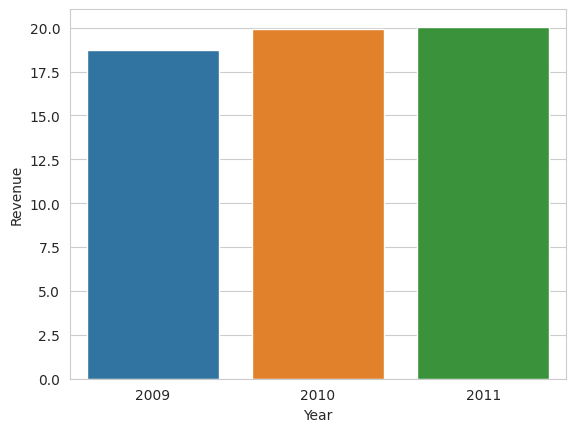

In [ ]:
sns.barplot(data=mean_revenue, x='Year', y='Revenue')

### Interpretation

Rata-rata pendapatan penjualan dalam 3 tahun terakhir selalu meningkat walaupun tidak signifikan kenaikan nya.

## Section 2: Menganalisis Transaksi Pelanggan Per Tahun

### Filtering Data 

1. Lakukan filtering menggunakan data sales (data yang sudah di filter pada section 1)
dengan ketentuan CustomerID tidak boleh kosong atau null. Kemudian simpan dalam
variabel finished.

#### Customers who finished their purchases

In [ ]:
finished = sales.dropna(subset=['Customer ID'])
finished.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
Year           0
Revenue        0
dtype: int64

In [ ]:
finished.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,30.0


2. Lakukan filtering data untuk mengelompokkan pelanggan yang membatalkan
belanjanya, dengan cara mendeteksi kolom Invoice mengandung huruf ‘C’. Kemudian
simpan dalam variabel baru bernama cancel.

#### Customers who canceled their purchases

In [ ]:
cancel = df[(df.Invoice.str.contains('C'))]
cancel.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,2009
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,2009
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,2009
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009


3. Hitung jumlah transaksi yang berhasil (dari variabel finished) dan jumlah transaksi yang
dibatalkan (dari variabel cancel) untuk setiap tahunnya. Lalu buatlah visualisasinya
(grafik).

### Number of Finished and Canceled Transactions Each Year

In [ ]:
sum_finished = finished.groupby('Year').count().reset_index()
sum_finished[['Year','Invoice']]

,Year,Invoice
0,2009,30761
1,2010,403094
2,2011,371765


In [ ]:
sum_cancel = cancel.groupby('Year').count().reset_index()
sum_cancel[['Year','Invoice']]

,Year,Invoice
0,2009,1015
1,2010,9919
2,2011,8560


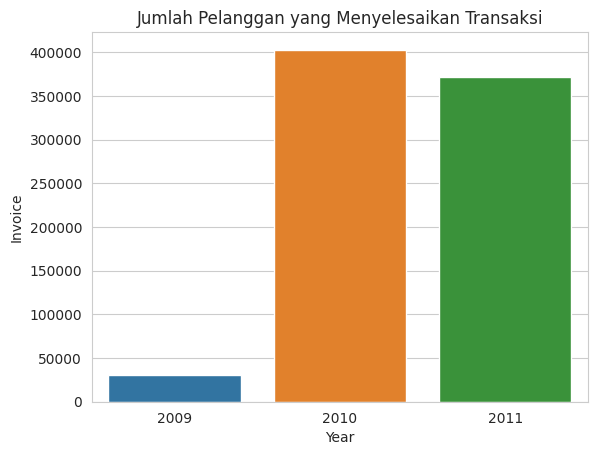

In [ ]:
sns.barplot(data=sum_finished,x='Year',y='Invoice')
plt.title('Jumlah Pelanggan yang Menyelesaikan Transaksi')
plt.show()

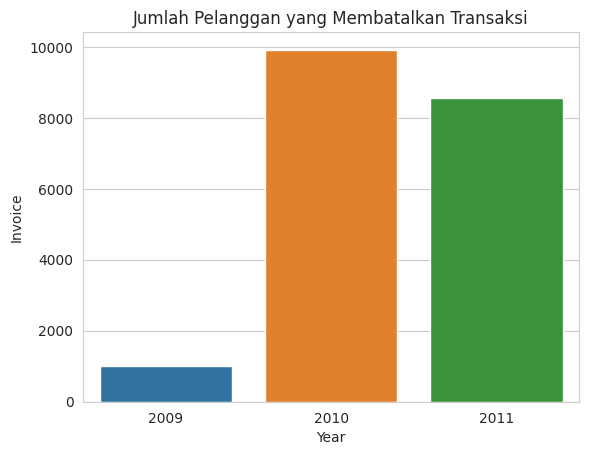

In [ ]:
sns.barplot(data=sum_cancel,x='Year',y='Invoice')
plt.title('Jumlah Pelanggan yang Membatalkan Transaksi')
plt.show()

Hitung cancellation rate untuk setiap tahunnya.
Cancellation rate adalah persentase pelanggan yang melakukan pembatalan order
yang telah dilakukan. Formulanya adalah jumlah customer yang cancel dibagi jumlah
seluruh customer kemudian dikali 100%.

### Cancellation Rate

In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009


In [ ]:
df_sum = df.groupby('Year').count().reset_index()
df_sum

,Year,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,2009,45228,45228,45000,45228,45228,45228,31760,45228
1,2010,522714,522714,519889,522714,522714,522714,412624,522714
2,2011,499429,499429,498100,499429,499429,499429,379980,499429


In [ ]:
df_sum

,Year,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,2009,45228,45228,45000,45228,45228,45228,31760,45228
1,2010,522714,522714,519889,522714,522714,522714,412624,522714
2,2011,499429,499429,498100,499429,499429,499429,379980,499429


In [ ]:
sum_cancel['Cancellation Rate'] = sum_cancel['Invoice'] / df_sum['Invoice'] * 100

In [ ]:
sum_cancel

,Year,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Cancellation Rate
0,2009,1015,1015,1015,1015,1015,1015,999,1015,2.244185
1,2010,9919,9919,9919,9919,9919,9919,9530,9919,1.897596
2,2011,8560,8560,8560,8560,8560,8560,8215,8560,1.713957


<Axes: xlabel='Year', ylabel='Cancellation Rate'>

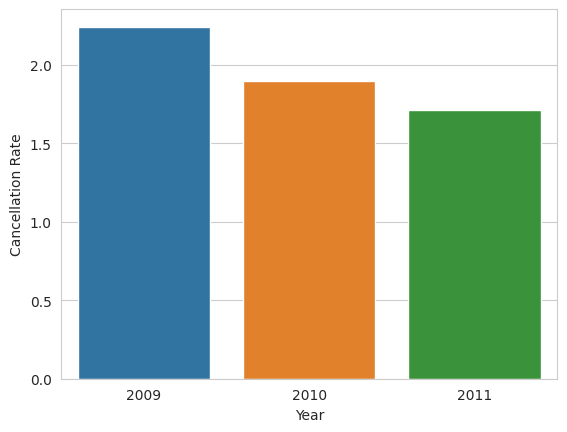

In [ ]:
sns.barplot(data=sum_cancel,x='Year', y='Cancellation Rate')

Bandingkan hasil output nomor 3 dan 4 untuk setiap tahunnya, dan tuliskan
interpretasi-mu.

### Interpretation

- Jumlah transaksi berhasil lebih tinggi dibandingkan dengan jumlah transaksi batal
- Transaksi berhasil paling banyak dilakukan pada tahun 2010 dan sebanding dengan jumlah pembatalan transaksi paling banyak.
- Diperoleh bar chart dari cancellation rate, dalam 3 tahun terakhir (2009-2011) mengalami penurunan yang berarti persentase pelanggan melakukan pembatalan transaksi dalam 3 tahun terakhir terus menurun.